In [5]:
import sys
sys.path.append('../../src')

from create_plots_feature import MakeFeaturePlots

### Hypotheses 1: Electronics and Age \
Electronic: Have you ever used personal electronics during takeoff or landing in violation of a flight attendant's direction? \
Age: How old are you?

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


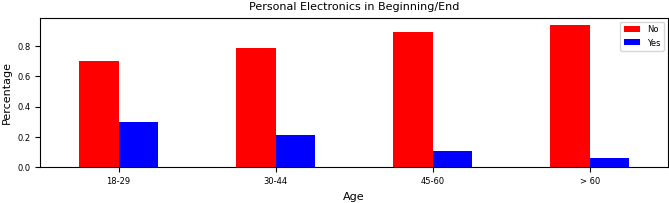

In [6]:
import pandas as pd
from tueplots.constants.color import rgb

PATH_CODED_CSV = '../../data/coded.csv'

event = "Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?"
condition = 'Age'

df  = pd.read_csv(PATH_CODED_CSV)

plotter = MakeFeaturePlots(df, condition)
#gradient_colors = ['#ff0000', '#d4002a', '#aa0055', '#7f007f', '#5500aa', '#2a00d4', '#0000ff']
plotter.plot_single_conditional_probabilities(event, color=['#ff0000', '#0000ff'], save_plot='hypo_1.pdf')